In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['CUDA _VISIBLE DEVICES']='-1'

In [3]:
x_train=np.loadtxt('input.csv', delimiter=',')
y_train=np.loadtxt('labels.csv', delimiter=',')

In [4]:
x_test=np.loadtxt('input_test.csv', delimiter=',')
y_test=np.loadtxt('labels_test.csv', delimiter=',')

In [5]:
x_train=x_train.reshape(len(x_train), 100, 100, 3)
y_train=y_train.reshape(len(y_train), 1)

In [6]:
x_test=x_test.reshape(len(x_test), 100, 100, 3)
y_test=y_test.reshape(len(y_test), 1)

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
print('Shape of X_train:', x_train.shape)
print('Shape of Y_train:', y_train.shape)
print('Shape of X_test:', x_test.shape)
print('Shape of Y_test:', y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


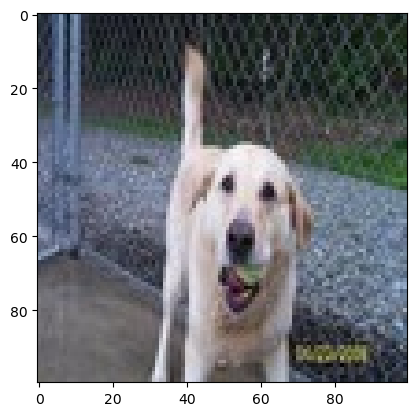

In [11]:
idx=random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [12]:
from tensorflow.keras.layers import BatchNormalization

In [14]:
model=Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    MaxPooling2D((4, 4)), Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

In [15]:
opt=SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
63/63 [==============================] - 119s 2s/step - loss: 0.8068 - accuracy: 0.5580 - val_loss: 0.7173 - val_accuracy: 0.4850
Epoch 2/20
63/63 [==============================] - 118s 2s/step - loss: 0.6417 - accuracy: 0.6440 - val_loss: 0.7951 - val_accuracy: 0.4925
Epoch 3/20
63/63 [==============================] - 119s 2s/step - loss: 0.6073 - accuracy: 0.6735 - val_loss: 0.7762 - val_accuracy: 0.5200
Epoch 4/20
63/63 [==============================] - 118s 2s/step - loss: 0.5782 - accuracy: 0.6980 - val_loss: 0.9747 - val_accuracy: 0.5225
Epoch 5/20
63/63 [==============================] - 116s 2s/step - loss: 0.5435 - accuracy: 0.7345 - val_loss: 0.6211 - val_accuracy: 0.6400
Epoch 6/20
63/63 [==============================] - 118s 2s/step - loss: 0.4928 - accuracy: 0.7590 - val_loss: 0.6341 - val_accuracy: 0.6475
Epoch 7/20
63/63 [==============================] - 117s 2s/step - loss: 0.4630 - accuracy: 0.7770 - val_loss: 0.6267 - val_accuracy: 0.6700
Epoch 8/20
63

In [17]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 4s 320ms/step - loss: 1.1182 - accuracy: 0.7175


[1.1182326078414917, 0.7174999713897705]

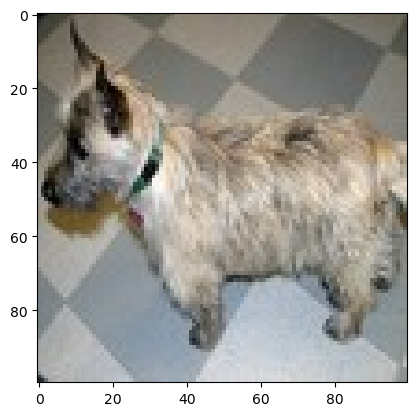

In [18]:
idx2=random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

In [19]:
y_pred=model.predict(x_test[idx2, :].reshape(1, 100, 100, 3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print('Our model says it is a', pred)
    

1/1 [==============================] - 0s 155ms/step
Our model says it is a dog


In [21]:
score=model.evaluate(x_test, y_test, verbose=0)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Test score:  1.1182326078414917
Test accuracy:  0.7174999713897705


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (Batch  (None, 98, 98, 256)       1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Bat  (None, 22, 22, 128)       512       
 chNormalization)                                                
                                                        

In [23]:
val=model.fit(x_train, y_train, epochs=5, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/5
67/67 [==============================] - 137s 2s/step - loss: 0.1018 - accuracy: 0.9590 - val_loss: 1.2162 - val_accuracy: 0.6700
Epoch 2/5
67/67 [==============================] - 146s 2s/step - loss: 0.0934 - accuracy: 0.9630 - val_loss: 1.7181 - val_accuracy: 0.6725
Epoch 3/5
67/67 [==============================] - 161s 2s/step - loss: 0.0925 - accuracy: 0.9640 - val_loss: 1.1244 - val_accuracy: 0.6900
Epoch 4/5
67/67 [==============================] - 142s 2s/step - loss: 0.0989 - accuracy: 0.9645 - val_loss: 1.1779 - val_accuracy: 0.7175
Epoch 5/5
67/67 [==============================] - 138s 2s/step - loss: 0.0787 - accuracy: 0.9720 - val_loss: 1.5897 - val_accuracy: 0.6725


In [ ]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(val.history['accuracy'])
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()